## Homework #6
#### Author: `<Alisa> <Lakhtiuk>`
#### Total time spent on h/w (in minutes): `<600>`

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [150]:
DIALOGS_MERGED_DATA_PATH = "../data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "../data/merged_data/dialogs_users_all.csv"

DIALOGS_DATA_FILIAL = "../data/dialogs/-1001124109395.csv"
DIALOGS_DATA_PLATC = "../data/dialogs/-1001695031361.csv"
DIALOGS_DATA_BARAHOLKA = "../data/dialogs/-1001218251741.csv"

STOPWORDS_DICT =  "../tone-dict-ukrainian/dicts/ukrainian_stopwords.txt"
TONE_DICT =  "../tone-dict-ukrainian/dicts/tone-dict-ua.csv"

In [151]:
df_merged = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_filial = pd.read_csv(DIALOGS_DATA_FILIAL)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)
df_platc = pd.read_csv(DIALOGS_DATA_PLATC)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1340\1756189484.py:1: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1340\1756189484.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_filial = pd.read_csv(DIALOGS_DATA_FILIAL)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1340\1756189484.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_platc = pd.read_csv(DIALOGS_DATA_PLATC)


In [152]:
df_filial.head(10)

,Unnamed: 0,id,date,from_id,to_id,fwd_from,message,type,duration,reactions
0,0,699122,2022-10-19 08:29:36+00:00,PeerUser(user_id=962137152),PeerChannel(channel_id=1124109395),NaN,NaN,text,NaN,{}
1,1,699121,2022-10-19 08:29:35+00:00,PeerUser(user_id=962137152),PeerChannel(channel_id=1124109395),NaN,Поточний етап у САЗ: Запис-2 (дозапис/корекція...,text,NaN,{399505299: '😢'}
2,2,699120,2022-10-14 11:46:37+00:00,PeerUser(user_id=255144521),PeerChannel(channel_id=1124109395),NaN,NaN,text,NaN,{}
3,3,699119,2022-10-14 11:46:34+00:00,PeerUser(user_id=255144521),PeerChannel(channel_id=1124109395),"MessageFwdHeader(date=datetime.datetime(2022, ...",🗳 Вибори до Студентської колегії ХХІІ скликанн...,photo,NaN,"{680521184: '😁', 399505299: '😁'}"
4,4,699118,2022-10-10 14:05:28+00:00,PeerUser(user_id=962137152),PeerChannel(channel_id=1124109395),NaN,Дубіна Ярослава Анатоліївна надсилає сповіщенн...,text,NaN,"{865096079: '👎', 324028943: '👎', 477350397: '👎..."
5,5,699117,2022-10-04 11:05:10+00:00,PeerUser(user_id=962137152),PeerChannel(channel_id=1124109395),NaN,Дубіна Ярослава Анатоліївна надсилає сповіщенн...,text,NaN,"{399505299: '🤩', 300622113: '🤩'}"
6,6,699116,2022-10-01 15:25:57+00:00,PeerUser(user_id=962137152),PeerChannel(channel_id=1124109395),NaN,Дубіна Ярослава Анатоліївна надсилає сповіщенн...,text,NaN,{}
7,7,699115,2022-09-29 05:32:56+00:00,PeerUser(user_id=962137152),PeerChannel(channel_id=1124109395),NaN,Дубіна Ярослава Анатоліївна надсилає сповіщенн...,text,NaN,{}
8,8,699114,2022-09-26 10:12:03+00:00,PeerUser(user_id=962137152),PeerChannel(channel_id=1124109395),NaN,NaN,text,NaN,{}
9,9,699113,2022-09-26 10:12:03+00:00,PeerUser(user_id=962137152),PeerChannel(channel_id=1124109395),NaN,Поточний етап у САЗ: Семестрова корекція закін...,text,NaN,"{399505299: '😁', 400996107: '👎', 384427702: '😢..."


In [165]:
df_filial.shape

(656956, 10)

Changing 'date' column to represent only year and a month

In [154]:
datetimes = df_filial['date']
dates = [d[:d.index(' ')] for d in datetimes]
dates0 = [d0[:7] for d0 in dates]
new_df_with_short_dates = df_filial.copy()
new_df_with_short_dates.date = dates0
new_df_with_short_dates.head(10)

,Unnamed: 0,id,date,from_id,to_id,fwd_from,message,type,duration,reactions
0,0,699122,2022-10,PeerUser(user_id=962137152),PeerChannel(channel_id=1124109395),NaN,NaN,text,NaN,{}
1,1,699121,2022-10,PeerUser(user_id=962137152),PeerChannel(channel_id=1124109395),NaN,Поточний етап у САЗ: Запис-2 (дозапис/корекція...,text,NaN,{399505299: '😢'}
2,2,699120,2022-10,PeerUser(user_id=255144521),PeerChannel(channel_id=1124109395),NaN,NaN,text,NaN,{}
3,3,699119,2022-10,PeerUser(user_id=255144521),PeerChannel(channel_id=1124109395),"MessageFwdHeader(date=datetime.datetime(2022, ...",🗳 Вибори до Студентської колегії ХХІІ скликанн...,photo,NaN,"{680521184: '😁', 399505299: '😁'}"
4,4,699118,2022-10,PeerUser(user_id=962137152),PeerChannel(channel_id=1124109395),NaN,Дубіна Ярослава Анатоліївна надсилає сповіщенн...,text,NaN,"{865096079: '👎', 324028943: '👎', 477350397: '👎..."
5,5,699117,2022-10,PeerUser(user_id=962137152),PeerChannel(channel_id=1124109395),NaN,Дубіна Ярослава Анатоліївна надсилає сповіщенн...,text,NaN,"{399505299: '🤩', 300622113: '🤩'}"
6,6,699116,2022-10,PeerUser(user_id=962137152),PeerChannel(channel_id=1124109395),NaN,Дубіна Ярослава Анатоліївна надсилає сповіщенн...,text,NaN,{}
7,7,699115,2022-09,PeerUser(user_id=962137152),PeerChannel(channel_id=1124109395),NaN,Дубіна Ярослава Анатоліївна надсилає сповіщенн...,text,NaN,{}
8,8,699114,2022-09,PeerUser(user_id=962137152),PeerChannel(channel_id=1124109395),NaN,NaN,text,NaN,{}
9,9,699113,2022-09,PeerUser(user_id=962137152),PeerChannel(channel_id=1124109395),NaN,Поточний етап у САЗ: Семестрова корекція закін...,text,NaN,"{399505299: '😁', 400996107: '👎', 384427702: '😢..."


Creating list of words to search in the chat "Філіал КМЦ"

In [155]:
listOfWordsToSearch = ['ракета', 'вибух']
df_filtered_by_words = new_df_with_short_dates.copy()
df_filtered_by_words.loc[df_filtered_by_words.message.str.contains('|'.join(listOfWordsToSearch), na=False)]

,Unnamed: 0,id,date,from_id,to_id,fwd_from,message,type,duration,reactions
134,134,698987,2022-02,PeerUser(user_id=439667440),PeerChannel(channel_id=1124109395),NaN,"«Какльі дамбят бамбас, прєкрьіваються мірньім ...",text,NaN,"{279884582: '👍', 290689545: '👍', 335610626: '👍..."
342,342,698763,2022-02,PeerUser(user_id=328409477),PeerChannel(channel_id=1124109395),NaN,там не одна ракета летить,text,NaN,{}
391,391,698713,2022-02,PeerUser(user_id=521739721),PeerChannel(channel_id=1124109395),"MessageFwdHeader(date=datetime.datetime(2022, ...",❗️❗️❗️Українці. ПОШИРЮЄМО❗️❗️❗️\n\nУВАГА війсь...,text,NaN,{}
926,926,698169,2022-02,PeerUser(user_id=1690741228),PeerChannel(channel_id=1124109395),"MessageFwdHeader(date=datetime.datetime(2022, ...",Украинец Остапчук Тарас Владимирович. Нанес се...,photo,NaN,{318203454: '❤'}
945,945,698150,2022-02,PeerUser(user_id=369312389),PeerChannel(channel_id=1124109395),"MessageFwdHeader(date=datetime.datetime(2022, ...",❌Обережно! Фейк! в Мережі поширюють відео ніби...,video,21.0,{}
...,...,...,...,...,...,...,...,...,...,...
619703,619703,38955,2017-10,PeerUser(user_id=322432555),PeerChannel(channel_id=1124109395),NaN,"В негативному, типу мега дратівливий і вибуховий",text,NaN,NaN
622083,622083,36494,2017-10,PeerUser(user_id=369190174),PeerChannel(channel_id=1124109395),NaN,В якому є п. 9. Поліцейському заборонено засто...,text,NaN,NaN
622100,622100,36477,2017-10,PeerUser(user_id=369190174),PeerChannel(channel_id=1124109395),NaN,"1. Они не мажоры. Они знакомые мажора, легкомы...",photo,NaN,NaN
631173,631173,26977,2017-10,PeerUser(user_id=255144521),PeerChannel(channel_id=1124109395),NaN,Студенти правничого факультету винні у вибухах...,text,NaN,NaN


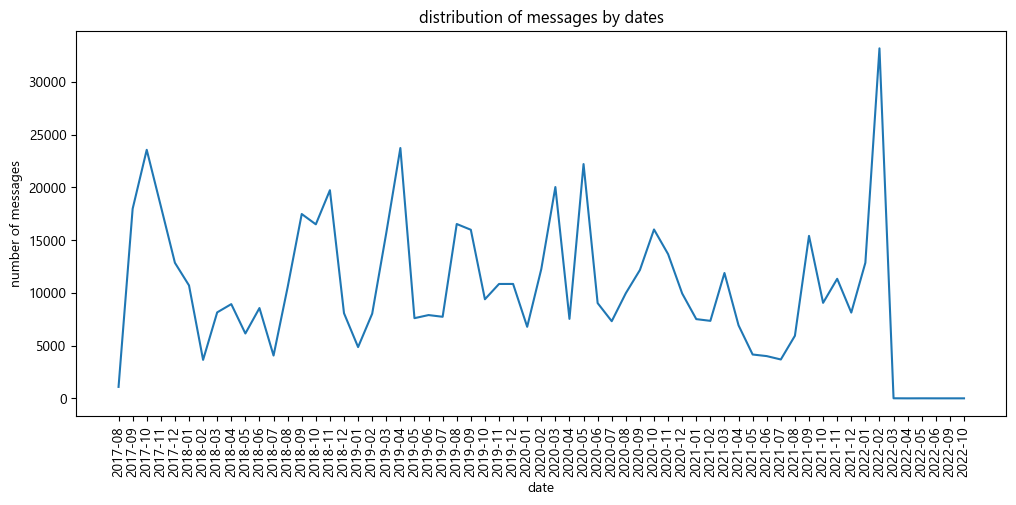

In [156]:
df_filtered_grouped = df_filtered_by_words.groupby(['date'])['message'].count()
df_gb_fr = pd.DataFrame(df_filtered_grouped, columns=['message']).reset_index()
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(5)
plt.title("distribution of messages by dates")
plt.xlabel("date")
plt.ylabel("number of messages")

plt.plot(df_gb_fr['date'], df_gb_fr['message'])
plt.xticks(rotation=90)
plt.show()

In [157]:
min(df_filial["date"]), max(df_filial["date"])

('2017-08-29 20:09:52+00:00', '2022-10-19 08:29:36+00:00')

Search the most popular emoji in chat "Філіал КМЦ"

In [158]:
df_copy_platc = df_platc.copy()
df_copy_platc.dropna()
df_platc_formatted_reactions = df_copy_platc.reactions[df_copy_platc.reactions != '{}']
df_platc_formatted_to_list = df_platc_formatted_reactions.tolist()
finStr = ', '.join(str(x).replace('\'', '\"')
                   .replace('{', '{\"')
                   .replace(':', '\":')
                   .replace('\", ', '\", \"')
                   .replace('{', '')
                   .replace('}', '')
                   .replace(',', '')
                   .replace(':', '') for x in df_platc_formatted_to_list if str(x) != 'nan')
finStr.replace(',', '')
finStrList = finStr.split('\"')

df_emoji_ids = pd.DataFrame(columns=['id', 'emoji'])
ind = 0
for i in range(len(finStrList)):
    if (finStrList[i] != ' ') & (not ',' in finStrList[i]):
        if re.findall('\d', finStrList[i]).__len__() > 0:
            df_emoji_ids.loc[ind, 'id'] = finStrList[i]
        else :
            df_emoji_ids.loc[ind, 'emoji'] = finStrList[i]
            ind += 1
    if i >= len(finStrList):
        break


array([<AxesSubplot: ylabel='id'>], dtype=object)

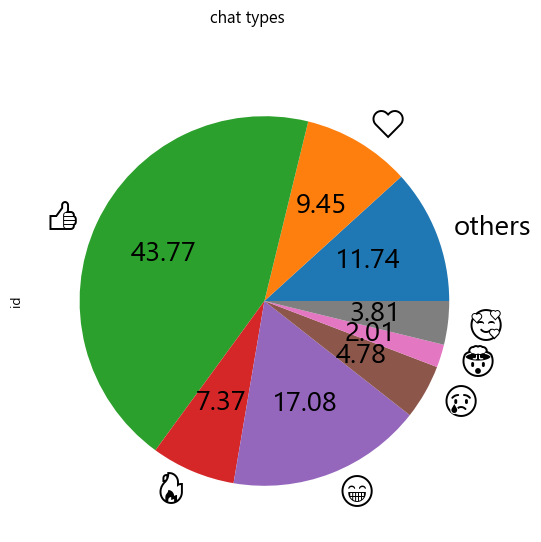

In [159]:
df_emoji_ids = df_emoji_ids.dropna()
df_emoji_ids['id'].astype('int64')
df_smiles_ids2 = df_emoji_ids.groupby(['emoji'])['id'].count().reset_index()

plt.rc('font', family = 'Segoe UI Emoji')

df_smiles_ids2_largest = df_smiles_ids2.nlargest(7, 'id')
list_of_largest_emoji = df_smiles_ids2_largest['emoji'].to_list() # ['👍', '😁', '❤', '🔥', '😢', '🥰', '🤯']
for i in range(len(df_emoji_ids)):
    if df_emoji_ids['emoji'][i + 1] not in list_of_largest_emoji:
        df_emoji_ids.loc[i + 1, 'emoji'] = 'others'
df_emoji_ids['id'] = df_emoji_ids['id'].astype('int64')
df_smiles_ids_with_others = df_emoji_ids.groupby(['emoji'])['id'].count()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
df_smiles_ids_with_others.plot.pie(subplots=True,
                                   figsize=(14, 6),
                                   autopct="%.2f",
                                   fontsize=20,
                                   title = 'chat types')

Find out the periods of choosing courses and groups in NaUKMA by mentions of automatic recording system

D:\education_stuff\ОШІ\lab06_css\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 1057 (\N{CYRILLIC CAPITAL LETTER ES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\education_stuff\ОШІ\lab06_css\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 1040 (\N{CYRILLIC CAPITAL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\education_stuff\ОШІ\lab06_css\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 1047 (\N{CYRILLIC CAPITAL LETTER ZE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


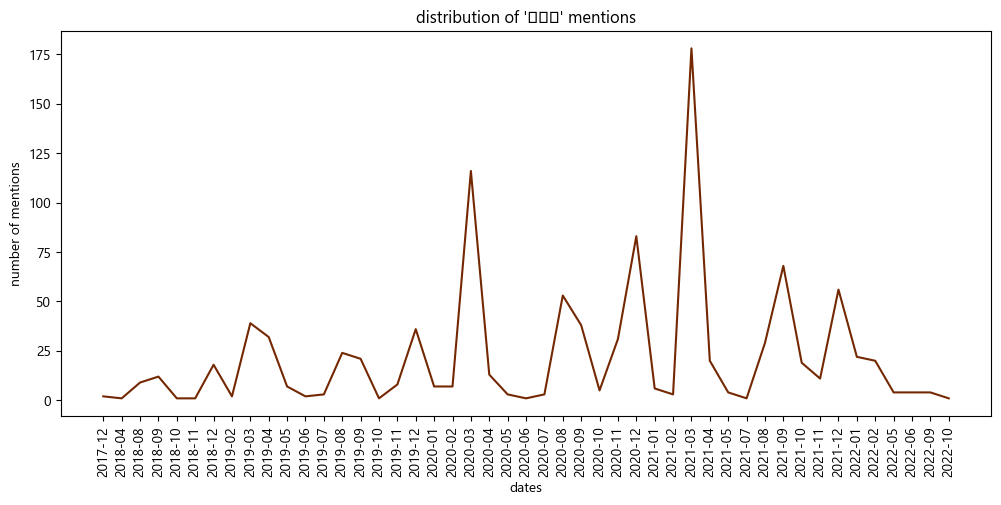

In [160]:
list_of_words_to_search_saz = ['САЗ', 'САЗІ', 'САЗУ', 'саз', 'сазу', 'сазі']
df_SAZ = df_filial.loc[df_filial.message.str.contains('|'.join(list_of_words_to_search_saz), na=False)]
datetimes_saz = df_SAZ['date']
dates_saz = [d[:d.index(' ')] for d in datetimes_saz]
dates_cut_saz = [d0[:7] for d0 in dates_saz]
new_df_saz = df_SAZ.copy()
new_df_saz.date = dates_cut_saz
new_df_saz.head(10)
df_gb0SAZ = new_df_saz.groupby(['date'])['message'].count()
df_gb_fr0 = pd.DataFrame(df_gb0SAZ, columns=['message']).reset_index()
f0SAZ = plt.figure()
f0SAZ.set_figwidth(12)
f0SAZ.set_figheight(5)
plt.title("distribution of 'САЗ' mentions") # rename
plt.xlabel("dates")
plt.ylabel("number of mentions")

plt.plot(df_gb_fr0['date'], df_gb_fr0['message'], color = "#742802")
plt.xticks(rotation=90)
plt.show()

In [161]:
df_merged_formatted = df_merged.message
df_merged_formattedToList = df_merged_formatted.tolist()
finStrMessages = ' '.join(str(x).replace('\n', ' ').replace('\'', '').replace('\\', '').replace(',', '').replace('.', '').replace(':', '').replace('\"', '').replace(';', '').replace('#', '').replace('-', '').replace('?', '').replace('!', '').replace('(', '').replace('_','' ).replace(')', '').lower() for x in df_merged_formattedToList)
finStrMessages = re.sub(r'[^\w]', ' ', finStrMessages) # remove all special characters
finStrMessages = re.sub("\s+", ' ', finStrMessages) # remove spaces
finStrMessages = re.sub(" \d+", " ", finStrMessages) # remove all numbers

words_in_merged_data = finStrMessages.split(' ')

uniqueWords = set(words_in_merged_data)
numOfWordsA = dict.fromkeys(uniqueWords, 0)
for word in words_in_merged_data:
    numOfWordsA[word] += 1
numOfWordsA.pop('')

211734

Distribution of usage of different words in all chats

10033


Text(0, 0.5, 'by alphabet')

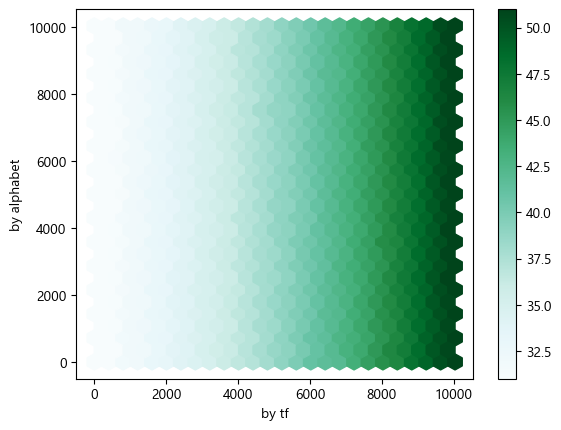

In [162]:
df_unique_words = pd.DataFrame(list(numOfWordsA.items()), columns=['word', 'quantity']).sort_values(by=['quantity'])
df_unique_words = df_unique_words[df_unique_words['quantity'].ge(df_unique_words['quantity'].quantile(0.95))]
df_unique_words = df_unique_words[df_unique_words['quantity'].le(df_unique_words['quantity'].quantile(0.35))]


def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict


indexes = []
nthTerm = 0
for i in range(1, len(df_unique_words) + 1):
    nthTerm = nthTerm + 1
    indexes.append(nthTerm)
df_unique_words['index1'] = indexes
df_unique_words = df_unique_words.sort_values(by=['word'])

tfA = computeTF(numOfWordsA, uniqueWords)
df_unique_words['tf'] = tfA
df_unique_words = df_unique_words.sort_values(by=['tf'])
df_unique_words['index2'] = indexes


ax = df_unique_words.plot.hexbin(x="index1", y="index2", C="quantity", gridsize=25)
ax.set_xlabel("by tf")
ax.set_ylabel("by alphabet")

Searching the most common prices in "Baraholka NaUKMA Chat"

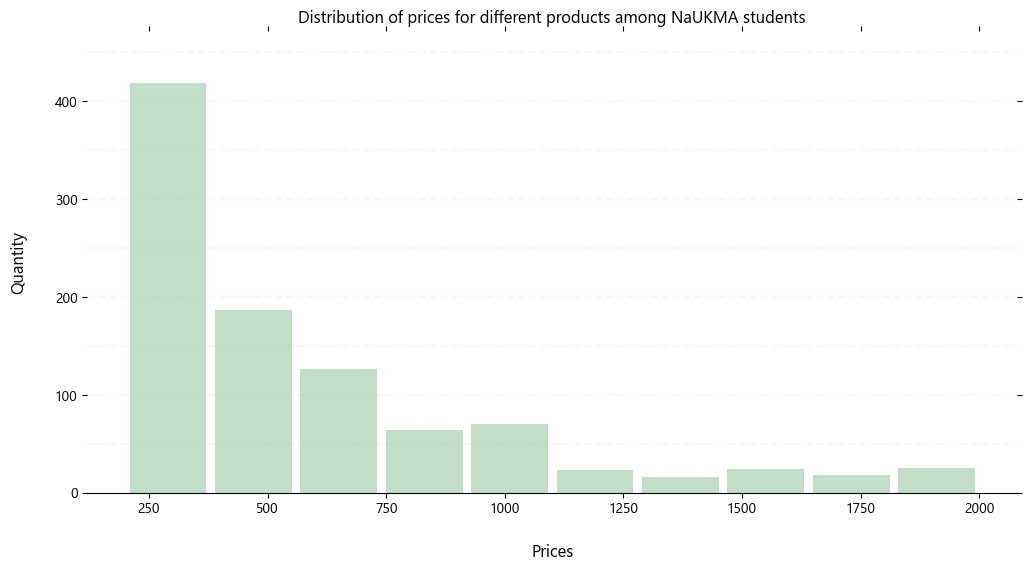

In [163]:
df_baraholka = pd.read_csv(DIALOGS_DATA_BARAHOLKA)
df_baraholka = df_baraholka[df_baraholka['message'].notna()] # filter dataframe from NaN values
listOfWordsToSearchSale = ['продам', 'продаю','продає','продасть', 'продати', 'продаж', 'маю', 'грн'] # create list of needed words
df_SALE = df_baraholka.loc[df_baraholka.message.str.contains('|'.join(listOfWordsToSearchSale), na=False)].reset_index() # filter dataframe and leave only needed words

df_SALE['price'] = None # add new column to add prices from messages to dataframe
df_SALE['price'].apply(pd.to_numeric)

for i in range(df_SALE.shape[0]):
    if re.findall('\d{2,6}', df_SALE['message'][i]).__len__() > 0:
        df_SALE.loc[i, 'price'] = int(re.findall('\d{2,6}', df_SALE['message'][i])[0])

df_SALE = df_SALE[df_SALE['price'] > 0]
df_SALE = df_SALE[~pd.isnull(df_SALE['price']) & ~df_SALE.price.isnull()].sort_values(by=['price'], ascending=False)

df_SALE = df_SALE[df_SALE['price'].ge(df_SALE['price'].quantile(0.65))]
df_SALE = df_SALE[df_SALE['price'].le(df_SALE['price'].quantile(0.85))]

df_SALE = df_SALE.astype({'price':'int'})
ax = df_SALE.hist(column='price', bins=10, grid=False, figsize=(12,6), color='#86bf91', zorder=2, rwidth=0.9, alpha=0.5)
ax = ax[0]
for x in ax:
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    x.set_title("Distribution of prices for different products among NaUKMA students")
    x.set_xlabel("Prices", labelpad=20, weight='bold', size=12)
    x.set_ylabel("Quantity", labelpad=20, weight='bold', size=12)


Distribution of different chat types

(14536, 4)
(515, 4)
type
Channel             8
Group             164
Private dialog    343
Name: name, dtype: int64
type
Channel             8
Group             164
Private dialog    343
Name: name, dtype: int64


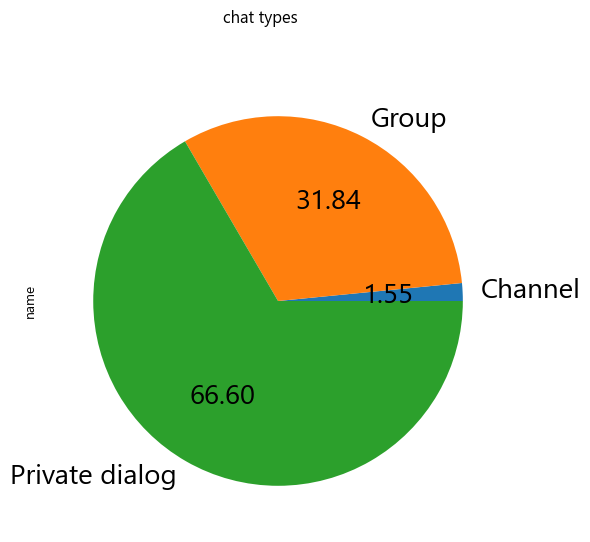

In [164]:
df_merged_meta_copy = df_meta.copy()
print(df_merged_meta_copy.shape)
df_merged_meta_copy = df_merged_meta_copy.drop_duplicates(subset = "name")
print(df_merged_meta_copy.shape)

df_merged_meta_copy = df_merged_meta_copy.groupby(['type'])['name'].count()
print(df_merged_meta_copy.head(25))
df_merged_meta_copy.plot.pie(subplots=True,
                             figsize=(14, 6),
                             autopct="%.2f",
                             fontsize=20,
                             title = 'chat types'
                             )
print(df_merged_meta_copy.head(15))